1. R-squared represents the proportion of variance in the dependent variable explained by the independent variables.

2. Assumptions of linear regression include linearity, independence, homoscedasticity, normality of residuals, and no multicollinearity.

3. R-squared measures fit, while Adjusted R-squared accounts for the number of predictors to prevent overfitting.

4. Mean Squared Error (MSE) quantifies the average squared difference between predicted and actual values.

5. An Adjusted R-squared of 0.85 means the model explains 85% of the variance, adjusted for the number of predictors.

6. Normality of residuals can be checked using Q-Q plots, histograms, or the Shapiro-Wilk test.

7. Multicollinearity occurs when predictors are highly correlated. It inflates standard errors and reduces model reliability.

8. Mean Absolute Error (MAE) is the average of absolute differences between predicted and actual values.

9. ML pipelines streamline data preprocessing and model training, ensuring reproducibility and cleaner code.

10. RMSE is more interpretable than MSE because it’s in the same unit as the target variable.

11. Pickling is saving a Python object to disk using `pickle`. It's useful for storing trained ML models.

12. A high R-squared means the model explains a large portion of the variance in the target variable.

13. Violating linear regression assumptions can lead to biased, inefficient, or misleading results.

14. Multicollinearity can be addressed using feature selection, PCA, or removing correlated variables.

15. Feature selection removes irrelevant features, improving model accuracy, interpretability, and speed.

16. Adjusted R-squared = 1 - \[(1 - R²)(n - 1) / (n - k - 1)], where *n* is samples and *k* is predictors.

17. MSE is sensitive to outliers because it squares errors, giving more weight to large deviations.

18. Homoscedasticity ensures equal error variance across all levels of predictors. It's vital for valid inference.

19. RMSE is the square root of MSE, representing model error in original units.

20. Pickling can be risky due to potential code injection and compatibility issues during unpickling.

21. Alternatives include `joblib`, saving models in ONNX format, or using libraries like `sklearn`'s `model.save()`.

22. Heteroscedasticity is unequal variance in residuals. It can distort statistical tests and predictions.

23. Interaction terms allow variables to jointly influence the target, capturing complex relationships in data.


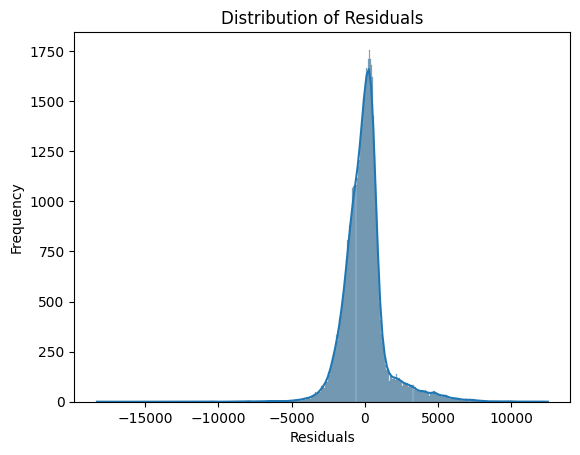

In [1]:
#1
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds').dropna()
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

model = LinearRegression().fit(X, y)
residuals = y - model.predict(X)

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [2]:
#2
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 0.375
MAE: 0.5
RMSE: 0.6123724356957945


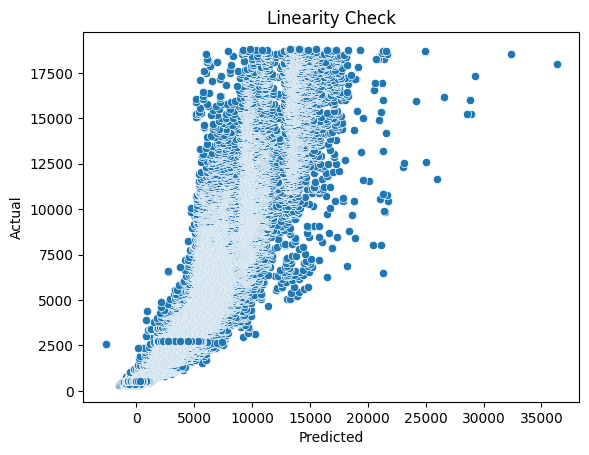

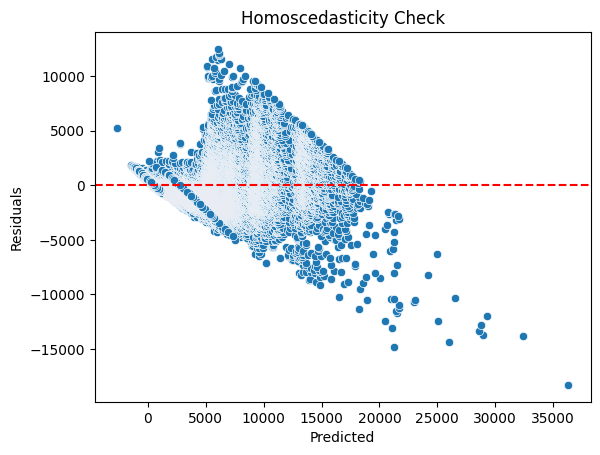

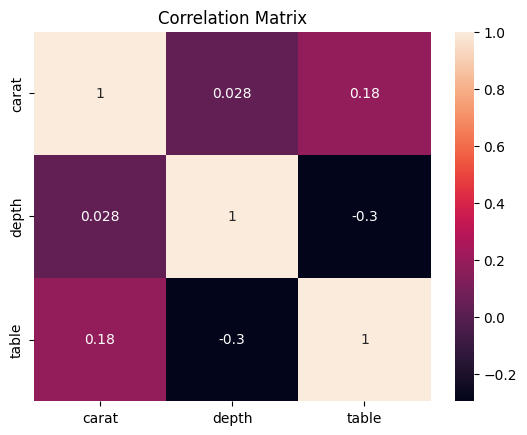

In [3]:
#3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("diamonds").dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']

model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

# Linearity
sns.scatterplot(x=predictions, y=y)
plt.title("Linearity Check")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Homoscedasticity
sns.scatterplot(x=predictions, y=residuals)
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Multicollinearity
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [5]:
#4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # Import make_regression

X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

pipeline.fit(X_train, y_train)
print("R-squared Score:", pipeline.score(X_test, y_test))


R-squared Score: 0.9825105488813564


In [6]:
#5
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))


Coefficient: [44.24418216]
Intercept: 0.09922221422587718
R-squared Score: 0.9374151607623286


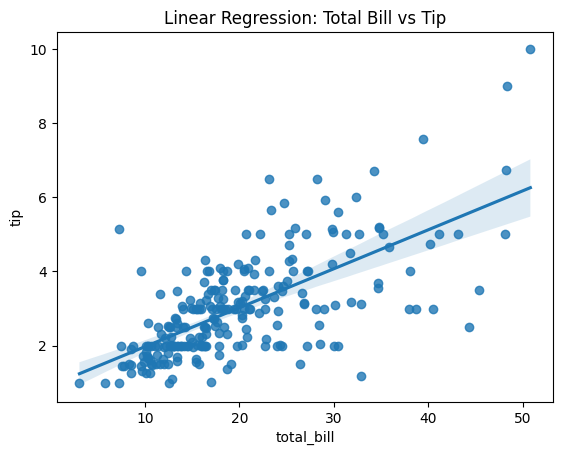

In [7]:
#6
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset("tips")
X = tips[['total_bill']]
y = tips['tip']

model = LinearRegression()
model.fit(X, y)

sns.regplot(x='total_bill', y='tip', data=tips)
plt.title("Linear Regression: Total Bill vs Tip")
plt.show()


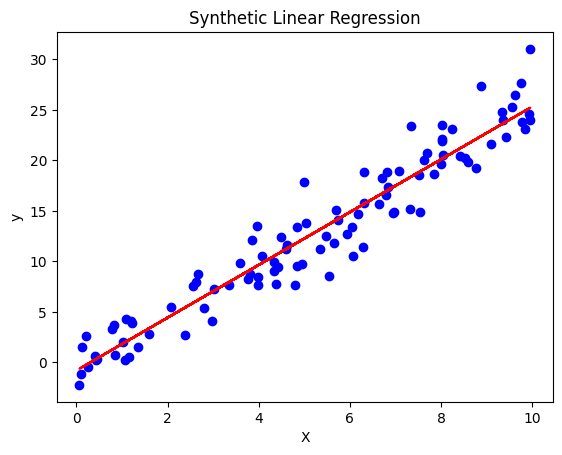

In [8]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 2.5 * X.flatten() + np.random.randn(100) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Synthetic Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [9]:
#8
import pickle
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved as linear_model.pkl")


Model saved as linear_model.pkl


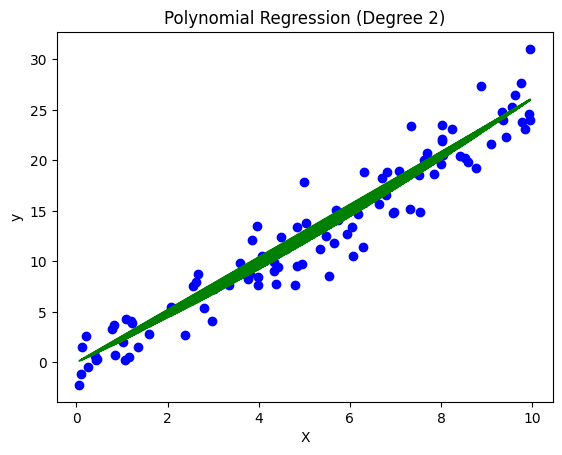

In [10]:
#9
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_poly_pred, color='green')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [11]:
#10
X = np.random.rand(100, 1) * 20
y = 4 * X.flatten() + np.random.randn(100) * 5

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [4.0721536]
Intercept: -0.5659482076856861


In [12]:
#11
degrees = [1, 2, 3, 4]
for d in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    poly_model.fit(X, y)
    y_pred = poly_model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"Degree {d} - R² Score: {r2:.4f}")


Degree 1 - R² Score: 0.9514
Degree 2 - R² Score: 0.9516
Degree 3 - R² Score: 0.9527
Degree 4 - R² Score: 0.9553


In [15]:
#12

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=100, n_features=2, noise=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

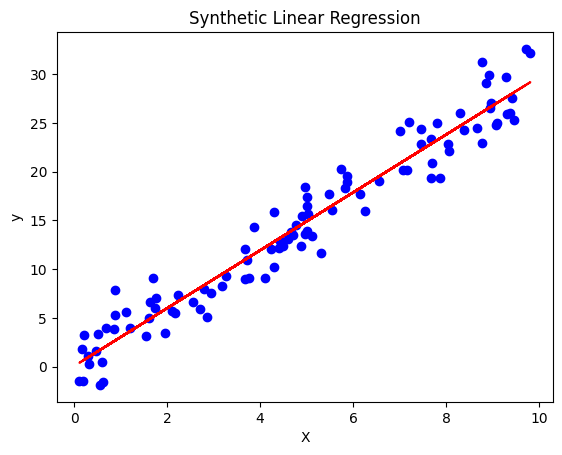

In [16]:
#13
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Synthetic Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [17]:
#14
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

X, _ = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)


     feature       VIF
0  feature_0  1.019320
1  feature_1  1.012651
2  feature_2  1.059337
3  feature_3  1.046592
4  feature_4  1.020596


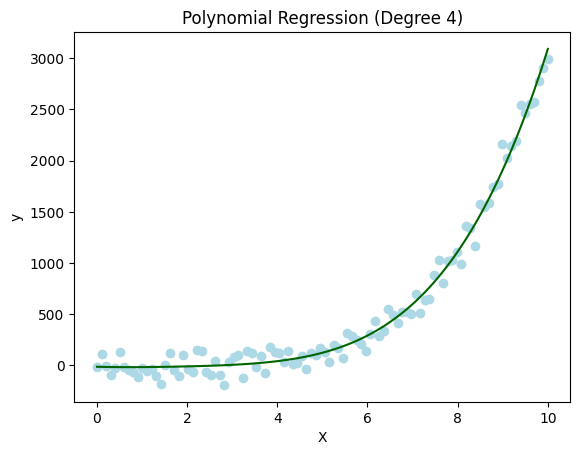

In [18]:
#15
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**4 - 2 * X.flatten()**3 + X.flatten()**2 + 3 * X.flatten() + np.random.randn(100) * 100

model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='lightblue')
plt.plot(X, y_pred, color='darkgreen')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [19]:
#16
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X, y)
print("R-squared Score:", pipeline.score(X, y))


R-squared Score: 0.9854985450036718


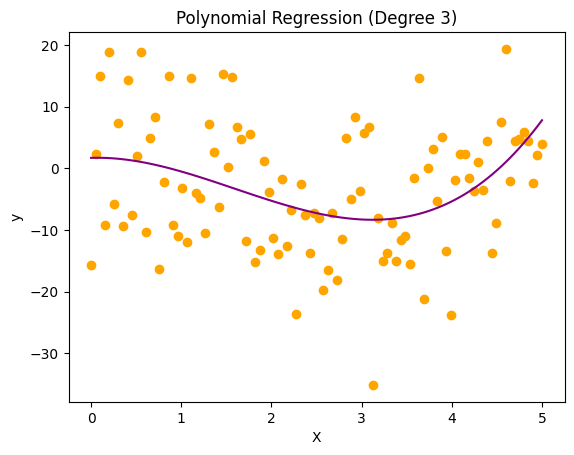

In [20]:
#17
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = X.flatten()**3 - 5*X.flatten()**2 + 3*X.flatten() + np.random.randn(100) * 10

model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='orange')
plt.plot(X, y_pred, color='purple')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [21]:
#18
X, y = make_regression(n_samples=100, n_features=5, noise=5, random_state=42)

model = LinearRegression()
model.fit(X, y)

print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared Score: 0.9988865923331391
Coefficients: [61.20375423 98.79174437 62.95113038 56.03447857 35.59986655]


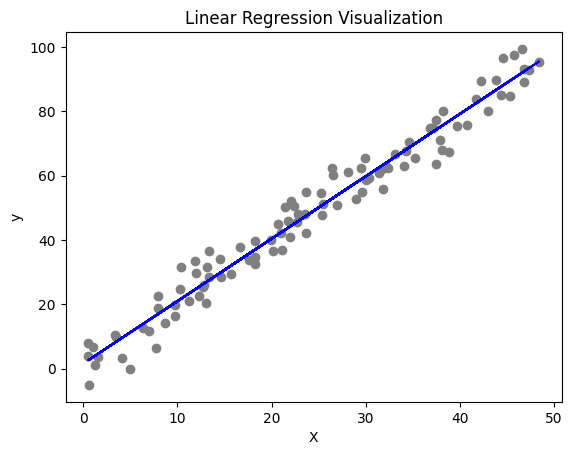

In [22]:
#19
X = np.random.rand(100, 1) * 50
y = 2 * X.flatten() + np.random.randn(100) * 5

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='grey')
plt.plot(X, y_pred, color='blue')
plt.title("Linear Regression Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [23]:
#20
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

model = LinearRegression()
model.fit(X, y)

print("R-squared Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared Score: 0.9854985450036718
Coefficients: [28.3172211  73.99152663 18.79832083]


In [28]:
#21
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib
#21
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import joblib

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#23
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

lr = LinearRegression()
ridge = Ridge(alpha=1.0)

lr.fit(X, y)
ridge.fit(X, y)

print("Linear Regression Coefficients:", lr.coef_)
print("Linear Regression R²:", lr.score(X, y))
print("Ridge Regression Coefficients:", ridge.coef_)
print("Ridge Regression R²:", ridge.score(X, y))


Linear Regression Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
Linear Regression R²: 0.9955395169111729
Ridge Regression Coefficients: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]
Ridge Regression R²: 0.9954097493195544


In [26]:
#24
from sklearn.model_selection import cross_val_score
import numpy as np

X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=42)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² scores:", scores)
print("Mean R² score:", np.mean(scores))


Cross-Validation R² scores: [0.99509929 0.99614535 0.99738505 0.99594058 0.99447607]
Mean R² score: 0.9958092683382231


In [27]:
#25
from sklearn.metrics import r2_score

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.flatten()**3 - X.flatten()**2 + X.flatten() + np.random.randn(100) * 30

for degree in range(1, 6):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} - R² Score: {r2:.4f}")


Degree 1 - R² Score: 0.8277
Degree 2 - R² Score: 0.9911
Degree 3 - R² Score: 0.9968
Degree 4 - R² Score: 0.9968
Degree 5 - R² Score: 0.9968
